In [1]:
%load_ext autoreload

%autoreload 2
import numpy as np
import corner, sys
import getdist
from getdist import plots, MCSamples
%matplotlib inline
import matplotlib.pyplot as plt
sys.path.append('../../modules/')
import numpy as np
#plt.switch_backend("Qt5Agg")

In [2]:
names = ['1', '2', '3', '4', '5', '6']
labels = [r'\ln \lambda_0', r'\mu_z', r'\mu_m', r'\sigma_{\ln \lambda, 0}', r'\sigma_z', r'\sigma_m']
settings={'mult_bias_correction_order':0,'smooth_scale_2D':4, 'smooth_scale_1D':4, 'boundary_correction_order':0}

In [3]:
n_cut=19000
name='1-halo=nfw+c-M=Duffy08_rmin=1.0-rmax=3.5_photoz=Truez_hmf=Despali16'
t = np.load(f'../chains/M/MCMC_fit_m-r_M_{name}.pkl', allow_pickle = True)
M = MCSamples(samples=t['flat_chains'][n_cut:],names = names, 
                    labels = labels, 
                     settings=settings, 
                     label='Lensing masses alone')
t = np.load('../chains/N/MCMC_fit_m-r_N_hmf=Despali16.pkl', allow_pickle = True)
N = MCSamples(samples=t['flat_chains'][n_cut:],names = names, 
                    labels = labels, 
                     settings=settings, 
                     label='Abundance alone')
t = np.load(f'../chains/MxN/MCMC_fit_m-r_MxN_{name}.pkl', allow_pickle = True)
MxN = MCSamples(samples=t['flat_chains'][n_cut:],names = names, 
                    labels = labels, 
                     settings=settings, 
                     label='Lensing masses + Abundance')
t = np.load(f'../chains/WL/MCMC_fit_m-r_WL_{name}.pkl', allow_pickle = True)
WL = MCSamples(samples=t['flat_chains'][n_cut:],names = names, 
                    labels = labels, 
                     settings=settings, 
                     label='Lensing profiles alone')
t = np.load(f'../chains/WLxN/MCMC_fit_m-r_WLxN_{name}.pkl', allow_pickle = True)
WLxN = MCSamples(samples=t['flat_chains'][n_cut:],names = names, 
                    labels = labels, 
                     settings=settings, 
                     label='Lensing profiles + Abundance')

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


In [4]:
params_fid=[3.345953364933381,
 0.06378674560099672,
 2.2274595352385975,
 0.5634900828247924,
 -0.04529427946062734,
 0.09764409931399064]

In [5]:
markers={f'{i+1}':params_fid[i] for i in range(len(params_fid))}

In [6]:
markers

{'1': 3.345953364933381,
 '2': 0.06378674560099672,
 '3': 2.2274595352385975,
 '4': 0.5634900828247924,
 '5': -0.04529427946062734,
 '6': 0.09764409931399064}

In [7]:
g = plots.get_subplot_plotter(subplot_size=1)
g.settings.lab_fontsize = 20
g.settings.legend_fontsize = 15
g.settings.axes_fontsize = 13
marker_args = {'lw':0.75, 'markersize':0.75, 'ls':'--','color':'b'}
range_ = {'1':[2.5,4], '2':[-2,2], '3':[1,4], '4':[0.1,1.2],'5':[-1.5,1.5], '6':[-0.5,0.5], }
g.triangle_plot(
                [N, WL,M,WLxN], 
                filled=[False, False, False, False, False], 
                contour_colors = ['b', 'r', 'g', 'k', 'r', 'k' ], 
                contour_ls=['-','--','-', '-', '-'],
                contour_lws=[0.7,1.2,1,1,2],shaded=True,
                legend_fontsize = 10,
                params=['1','2','3','4','5','6'],
                markers=markers,
                fine_bins = 5,  
                marker_args = marker_args)
plt.savefig(f'../fig/mcmc_scaling_relation_{name}_alone.png', dpi = 300)

In [8]:
t = np.load(f'../chains/WLxN/MCMC_fit_m-r_WLxN_1-halo=nfw+c-M=Duffy08_rmin=1.0-rmax=3.5_photoz=Truez_low_richness_sample_hmf=Despali16.pkl', allow_pickle = True)
WLxNlowrichness = MCSamples(samples=t['flat_chains'][n_cut:],names = names, 
                    labels = labels, 
                     settings=settings, 
                     label='Lensing profiles + Abundance ($\lambda < 100$)')

Removed no burn in


In [9]:
t = np.load(f'../chains/WLxN/MCMC_fit_m-r_WLxN_1-halo=nfw+c-M=Duffy08_rmin=1.0-rmax=3.5_photoz=Truez_low_z_sample_hmf=Despali16.pkl', allow_pickle = True)
WLxNlowz = MCSamples(samples=t['flat_chains'][n_cut:],names = names, 
                    labels = labels, 
                     settings=settings, 
                     label='Lensing profiles + Abundance ($z < 0.8$)')

Removed no burn in


In [10]:
np.mean(WLxN.samples, axis=0)

array([3.37415474, 0.07559887, 2.18382289, 0.53026216, 0.20419979,
       0.14129371])

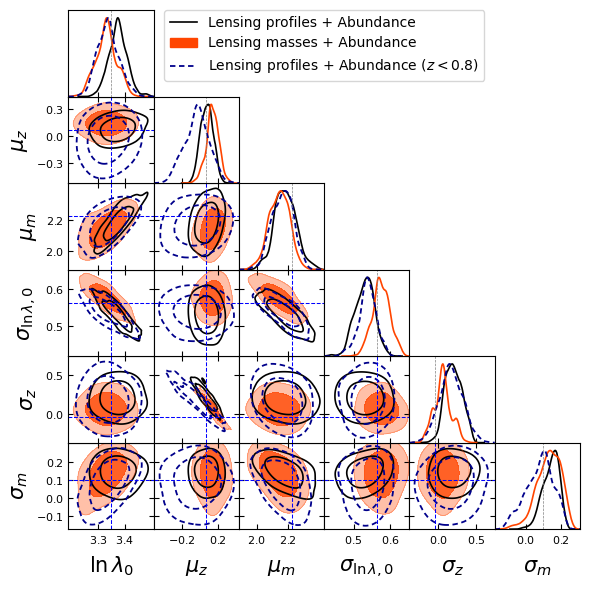

In [ ]:
g = plots.get_subplot_plotter(subplot_size=1.)
g.settings.lab_fontsize = 20
g.settings.legend_fontsize = 15
g.settings.axes_fontsize = 13
range_ = {'1':[2.5,4], '2':[-2,2], '3':[1,4], '4':[0.1,1.2],'5':[-1.5,1.5], '6':[-0.5,0.5], }
g.triangle_plot(
                [WLxN,MxN, WLxNlowz], 
                filled=[False, True, False, False, False], 
                contour_colors = ['k', 'orangered', 'darkblue', 'r', 'r', 'k' ], 
                contour_ls=['-','-','--', '--', '-'],
                contour_lws=[1.2,1.2,1.3,2,2],
                legend_fontsize = 10,
                #param_limits=range_,
                params=['1','2','3','4','5','6'],markers=markers,
                fine_bins = 1,  marker_args = marker_args, )
plt.savefig(f'../fig/mcmc_scaling_relation_{name}_joint.png', dpi = 300)